# Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Load dataset

In [ ]:
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

OSError: [Errno 22] Invalid argument: 'D:\\Coding\\VS Code\\AI ML\x0craud datsets\x0craudTrain.csv'

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


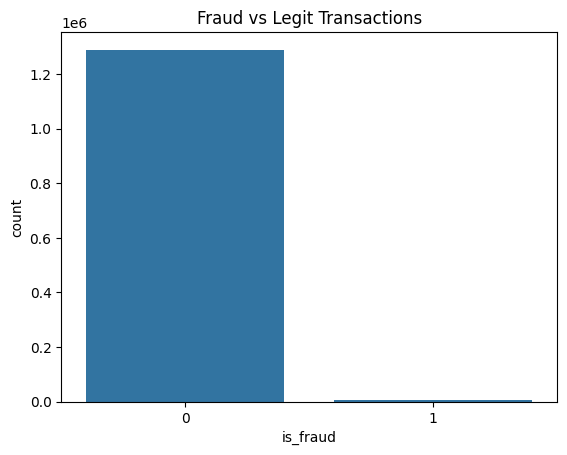

In [ ]:
print(train_df['is_fraud'].value_counts())
sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Legit Transactions")
plt.show()

### Data Preprocessing

In [ ]:
full_df = pd.concat([train_df, test_df], axis=0)

drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'dob',
            'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'merchant', 'trans_num']
full_df.drop(columns=[col for col in drop_cols if col in full_df.columns], inplace=True)

label_cols = ['category', 'gender']
le = LabelEncoder()
for col in label_cols:
    if col in full_df.columns:
        full_df[col] = le.fit_transform(full_df[col])
        

In [ ]:
train_size = train_df.shape[0]
train_processed = full_df[:train_size]
test_processed = full_df[train_size:]

In [ ]:
X_train = train_processed.drop('is_fraud', axis=1)
y_train = train_processed['is_fraud']
X_test = test_processed.drop('is_fraud', axis=1)
y_test = test_processed['is_fraud']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models Fitting

### 1. Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 2. Decisison Tree

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

### 3. Nive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

## Evaluation

### Logistic regression

In [ ]:
log_preds = log_model.predict(X_test)

print("Logistic Regression Results:\n", classification_report(y_test, log_preds))

Logistic Regression Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



### Decision Tree

In [ ]:
dt_preds = dt_model.predict(X_test)

print("Decision Tree Results:\n", classification_report(y_test, dt_preds))

Decision Tree Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.68      0.63      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.81      0.83    555719
weighted avg       1.00      1.00      1.00    555719



### Naive Bayes

In [ ]:
nb_preds = nb_model.predict(X_test)

print("Naive Bayes:\n", classification_report(y_test, nb_preds))

Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.20      0.47      0.28      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.73      0.64    555719
weighted avg       0.99      0.99      0.99    555719

